# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: 2.21 Członkowie: Dominik Sakłaski - 415120 Dominika Pudło - 415180 Karolina Murzyn - 409892 Jan Dworak - 412302

---

# Zestaw zadań 7: Estymacja nieparametryczna

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
from scipy.stats import kstwo

### Dane do zadań

W celu wygenerowania danych wykonaj poniższą komórkę.

In [3]:
# Dane do testów 1
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

,X
0,4.338105
1,3.906813
2,4.006564
3,4.081503
4,3.842215


### Zadanie 1: Histogram [5 pkt]

#### a) Przygotowanie wykresów

Korzystając z funkcji `seaborn.histplot()`przygotuj histogramy częstości zestawu danych zawartego w zmiennej `sample`.

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Podczas wykonywania kolejnych histogramów:
 - nie ustawiaj żadnych wartość określających podział na przedziały oraz granice przedziałów,
 - ustaw wyłącznie liczbę przedziałów na 20,
 - ustaw wyłącznie szerokość przedziałów na 0.3,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.05,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.15,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.4.
 
Do każdego z wykresów dodaj wizualną reprezentację zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej histogramu. Ustaw identyczne zakresy osi dla wszystkich wykresów.

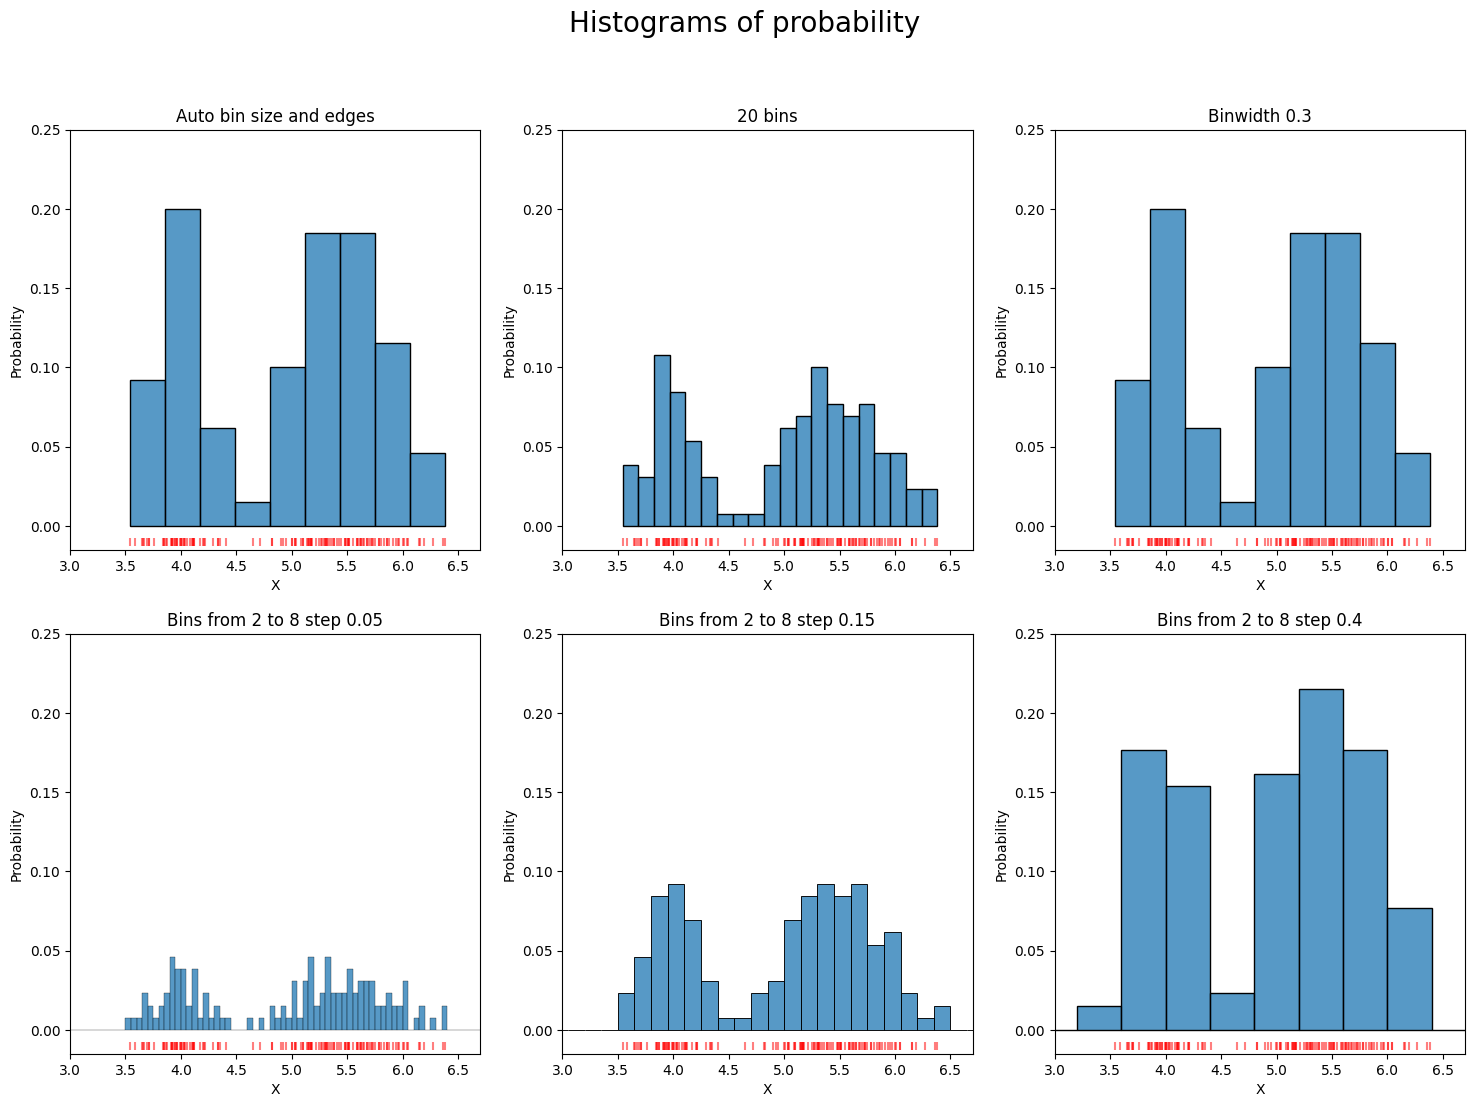

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12), facecolor='white')
fig.suptitle("Histograms of probability", size=20)
x_min = 3.0
x_max = 6.7
y_min = -0.015
y_max = 0.25

axes[0,0].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5) # dodanie zbioru symboli jako wizualna reprezentacja zestawu danych
sns.histplot(sample["X"], ax=axes[0,0], stat="probability")  # histogram częstości zestawu danych
axes[0, 0].set_title('Auto bin size and edges')  #tytuł
axes[0,0].set_xlim(x_min, x_max)  #zakresy osi OX
axes[0,0].set_ylim(y_min, y_max) #zakresy osi OY

        
axes[0,1].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5)        
sns.histplot(sample["X"], bins=20, ax=axes[0, 1], stat="probability")
axes[0, 1].set_title('20 bins')
axes[0,1].set_xlim(x_min, x_max)
axes[0,1].set_ylim(y_min, y_max)


axes[0,2].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5)        
sns.histplot(sample["X"], binwidth=0.3, ax=axes[0, 2], stat="probability")
axes[0, 2].set_title('Binwidth 0.3')
axes[0,2].set_xlim(x_min, x_max)
axes[0,2].set_ylim(y_min, y_max)


axes[1,0].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5)
bins_005 = np.arange(2, 8 + 0.05, 0.05)   # generowanie wartości do krawędzi przedziałów w histogramie
sns.histplot(sample["X"], bins=bins_005, ax=axes[1, 0], stat="probability")
axes[1, 0].set_title('Bins from 2 to 8 step 0.05')
axes[1,0].set_xlim(x_min, x_max)
axes[1,0].set_ylim(y_min, y_max)
        
axes[1,1].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5)       
bins_015 = np.arange(2, 8 + 0.15, 0.15)    # generowanie wartości do krawędzi przedziałów w histogramie
sns.histplot(sample["X"], bins=bins_015, ax=axes[1, 1], stat="probability")
axes[1, 1].set_title('Bins from 2 to 8 step 0.15')
axes[1,1].set_xlim(x_min, x_max)
axes[1,1].set_ylim(y_min, y_max)

        
axes[1,2].scatter(sample["X"], np.full_like(sample["X"], -0.01), marker='|', color='red', alpha=0.5)        
bins_04 = np.arange(2, 8 + 0.4, 0.4)     # generowanie wartości do krawędzi przedziałów w histogramie
sns.histplot(sample["X"], bins=bins_04, ax=axes[1, 2], stat="probability")
axes[1, 2].set_title('Bins from 2 to 8 step 0.4')
axes[1,2].set_xlim(x_min, x_max)
axes[1,2].set_ylim(y_min, y_max)


plt.show()


### Zadanie 2: Estymacja funkcją jądrową [16 pkt]

#### a) Estymacji funkcjami jądrowymi od podstaw

Przygotuj funkcję `simple_kde_estimation()`, która będzie dokonywała estymacji nieparametrycznej metodą funkcji jądrowych z wykorzystaniem jądra w postaci rozkładu normalnego o odchyleniu normalnym $\sigma$ zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres zawierający wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej wykresu.

Uwagi do wykonania zadania:
 - Punkty estymacji wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.
 - Przygotowując figurę kieruj się wytycznymi z początku notatnika.

In [5]:
def simple_kde_estimation(data, estimation_points, sigma):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    estimation_points: int
        Liczba punktów estymacji funkcji gęstości prawdopodobieństwa.
    sigma: float
        Odchylenie standardowe rozkładu normalnego wykorzystywanego jako jądro funkcji.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco punkty estymacji funkcji gęstości prawdopodobieństwa,
        KDE - wyestymowane wartości funkcji gęstości prawdopodobieństwa.
    """

    minimum = data.min()
    maksimum = data.max()
    
    X = np.linspace(minimum-3*sigma, maksimum + 3 * sigma, num = estimation_points)
    
    d = X[2] - X[1]
    fi = np.empty(len(X))
    
    for i in range(len(X)):
        f = sp.stats.norm.pdf(data, X[i], sigma)
        f = f.sum()
        fi[i] = f
        
    dzielnik = 0
    
    for i in range(len(X)):
        dzielnik += fi[i] * d
        
    KDE = fi / dzielnik
    KDE = np.atleast_2d(KDE).T
    cdf = pd.DataFrame(data = np.hstack([X, KDE]), columns = ['X', 'KDE'])


    plt.figure(figsize = (10, 6), facecolor = 'white')
    #plt.suptitle("Kernel function estimation", size=20)  #funkcja generuje jeden wykres wiec podpisujemy tylko wykres, figury nie
    plt.fill_between(cdf['X'], cdf['KDE'], color='skyblue', alpha=0.5)
    plt.plot(cdf['X'], cdf['KDE'], color='blue')
    plt.scatter(data['X'], [-0.02]*len(data), marker = '|', color = 'red', s = 150)  # wizualna reprezentacja danych
    
    plt.title('Kernel Density Estimation')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()
    
    return cdf


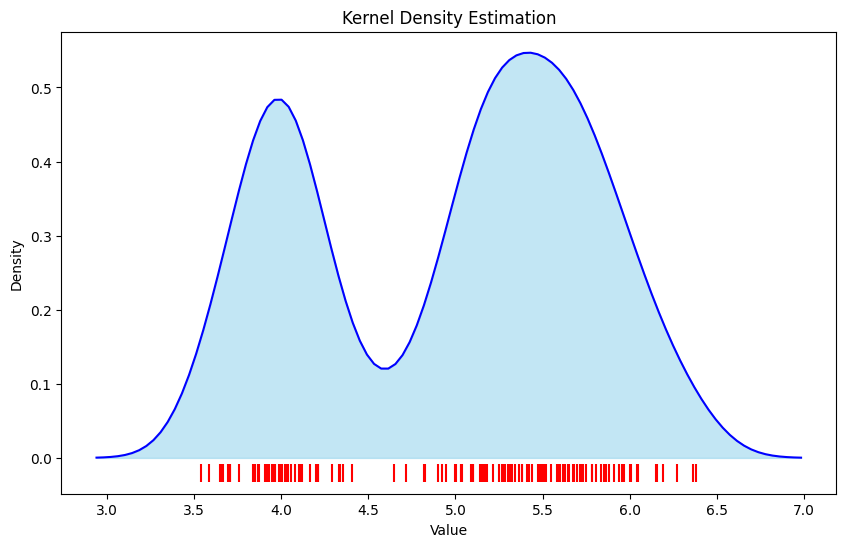

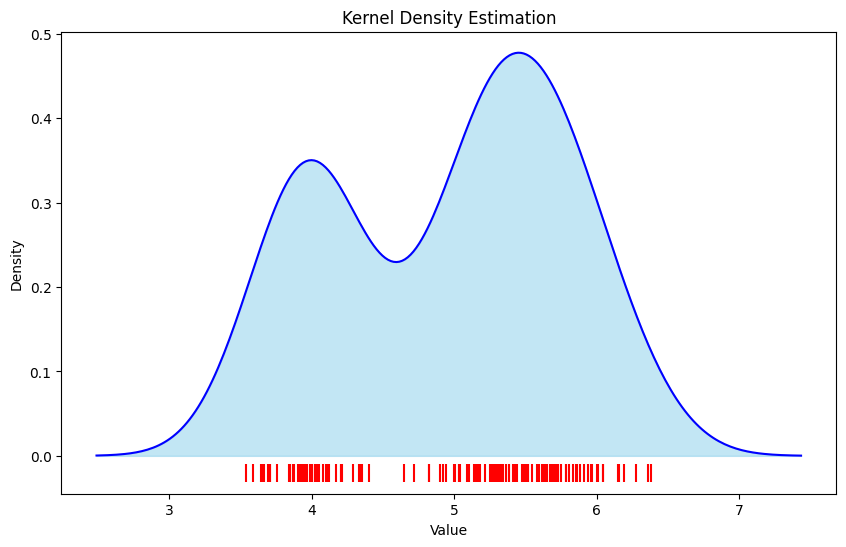

In [6]:
# Komórka testowa
test_results_1 = simple_kde_estimation(sample, estimation_points=100, sigma=0.2)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (100, 2)
assert list(test_results_1.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_1.min().values, [2.94233698e+00, 3.32813073e-04]))
assert np.all(np.isclose(test_results_1.max().values, [6.98176057, 0.54688772]))
assert np.all(np.isclose(test_results_1.mean().values, [4.96204877, 0.24508447]))

test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (250, 2)
assert list(test_results_2.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_2.min().values, [2.49233698e+00, 2.69768435e-04]))
assert np.all(np.isclose(test_results_2.max().values, [7.43176057, 0.47782523]))
assert np.all(np.isclose(test_results_2.mean().values, [4.96204877, 0.20164296]))

#### b) Dedykowane funkcje

Korzystając z klasy `KernelDensity` wchodzącej w skład pakietu scikit-learn dokonaj estymymacji rozkładu zestawu danych zawartego w zmiennej `sample`.

Wyniki estymacji przedstaw w postaci wykresów zawierających wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci pionowych kresek zlokalizowanych poniżej wykresu.

Wykresy zestaw na dwóch figurach (2x3 pola na wykres). Przygotowując figury kieruj się wytycznymi z początku notatnika. Podczas wykonywania wykresów:
 - Figura 1:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji na 0.1,
     - ustaw identyczne zakresy osi dla wszystkich wykresów.
 - Figura 2:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji tak, aby wynik pracy funkcji dobrze oddawał charakter rozkładu populacji z której została pobrana próba losowa,
     - ustaw identyczne zakresy osi dla wszystkich wykresów. 

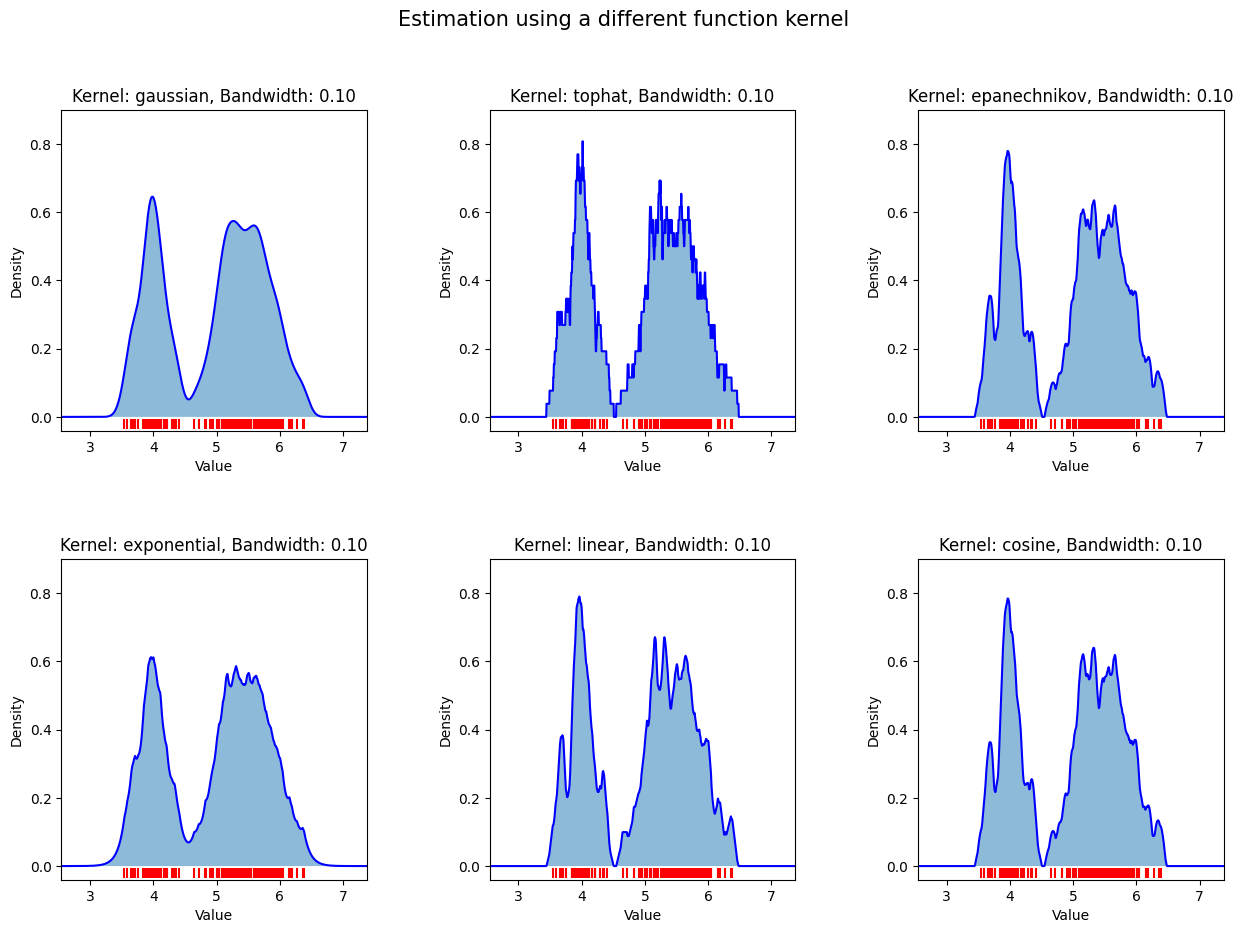

In [7]:
# Figura 1
# YOUR CODE HERE

sample_values = sample['X'].values
X_plot = np.linspace(sample_values.min() - 1, sample_values.max() + 1, 1000)[:, np.newaxis]

fig, axs = plt.subplots(2, 3, figsize=(15, 10), facecolor='white')
fig.suptitle("Estimation using a different function kernel", size=15)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
bandwidths = 0.1

for ax, kernel in zip(axs.ravel(), kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidths)
    kde.fit(sample_values[:, np.newaxis])
    log_dens = kde.score_samples(X_plot)
    dens = np.exp(log_dens)

    ax.fill_between(X_plot.ravel(), dens, alpha=0.5)
    ax.plot(X_plot.ravel(), dens, color='blue')
    ax.scatter(sample_values, [-0.02] * len(sample_values), marker='|', color='red', s=50)
    ax.set_title(f'Kernel: {kernel}, Bandwidth: {bandwidths:.2f}')
    ax.set_xlim(X_plot.min(), X_plot.max())
    ax.set_ylim(-0.04, 0.9)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

plt.show()


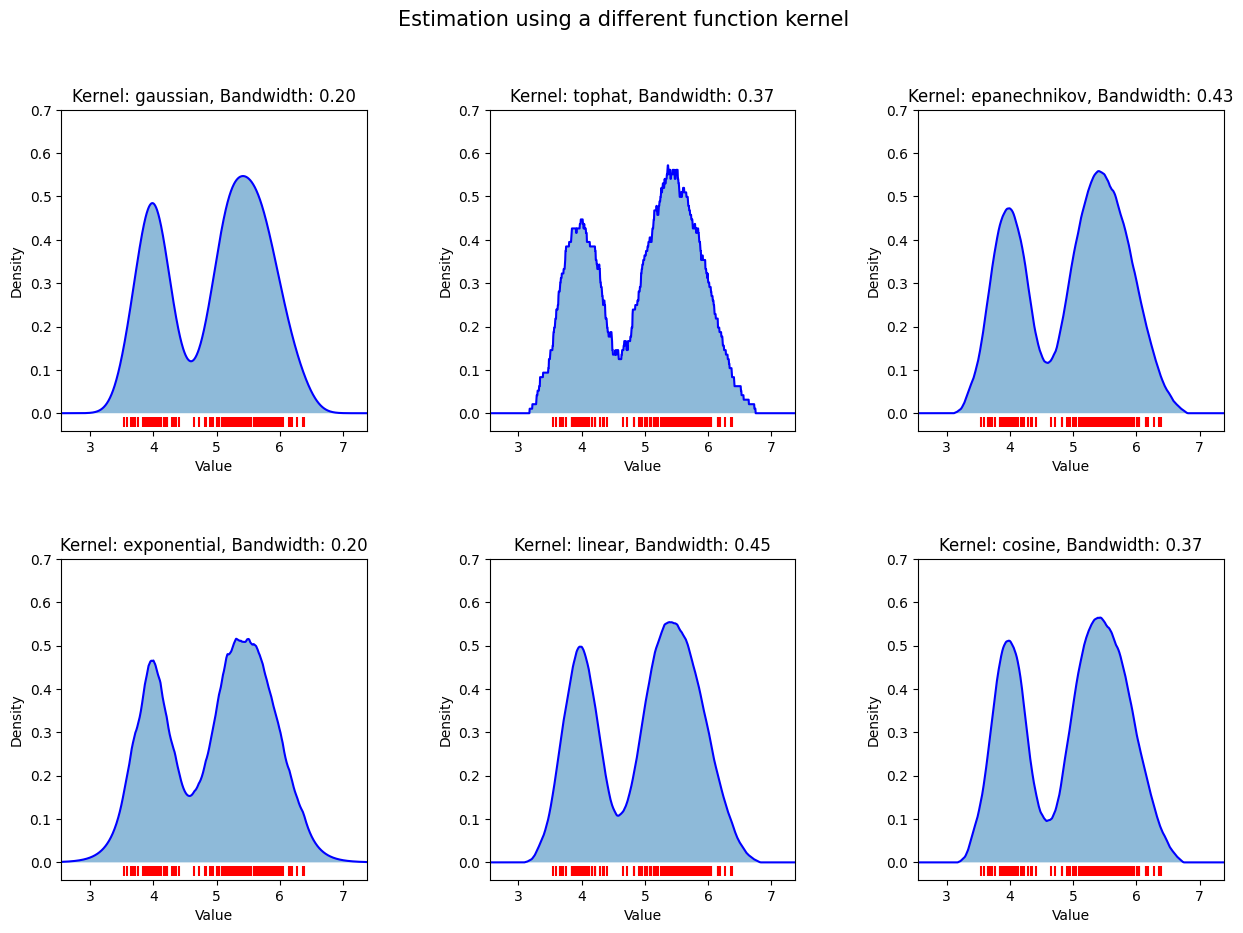

In [8]:
# Figura 2
# YOUR CODE HERE

sample_values = sample['X'].values
X_plot = np.linspace(sample_values.min() - 1, sample_values.max() + 1, 1000)[:, np.newaxis]
fig, axs = plt.subplots(2, 3, figsize=(15, 10), facecolor='white')
fig.suptitle("Estimation using a different function kernel", size=15)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
bandwidths = [0.2, 0.37, 0.43, 0.20, 0.45, 0.37]  # Te wartości można dostosować

for ax, kernel, bw in zip(axs.ravel(), kernels, bandwidths):
    kde = KernelDensity(kernel=kernel, bandwidth=bw)
    kde.fit(sample_values[:, np.newaxis])
    log_dens = kde.score_samples(X_plot)
    dens = np.exp(log_dens)

    ax.fill_between(X_plot.ravel(), dens, alpha=0.5)
    ax.plot(X_plot.ravel(), dens, color='blue')
    ax.scatter(sample_values, [-0.02] * len(sample_values), marker='|', color='red', s=50)
    ax.set_title(f'Kernel: {kernel}, Bandwidth: {bw:.2f}')
    ax.set_xlim(X_plot.min(), X_plot.max())
    ax.set_ylim(-0.04, 0.7)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
plt.show()

### Zadanie 3: Dyskusja wyników [6 pkt]

Przygotowane w poprzednich zadaniach wykresy są wizualną reprezentacją tego samego zestawu danych, dobór metody oraz jej parametrów sparawia jednak, że nie wyglądają one identycznie.

Przedyskutuj plusy i minusy obu metod oraz odpowiedz na pytanie w jaki sposób dobór parametrów funkcji (liczba, szerokość i położenie granic przedziałów, wykorzystana wersja oraz szerokość jadra) wpływa na poprawność i czytelność wyniku.

YOUR ANSWER HERE

Histogram:
    PLUSY:
    
+ wyraźnie pokazuje, ile punktów danych wpada do każdego przedziału, dostarczając intuicyjnego poczucia rozkładu danych 
+ możemy odczytać, w jaki sposób dane są rozłożone wokół 
różnych wartośc
+ możliwość łatwego zauważenia wartości skrajnych i typowych oraz wielomodalności danych
+ łatwe do zrozumienia i interpretacji, szczególnie dla osób niezaznajomionych z pojęciami statystycznymi - prostota i przejrzystość.
     MINUS:
  e
- wygląd histogramu może się znacznie zmienić w zależności od wyboru szerokości, granic i liczby przedziałów, co może prowadzić do różnych interpretacji rozkładu danych (często błędnych)
- nie dostarczają gładkiego przeglądu rozkładu danych, skupiają się na dyskretnych przedziałach - brak szczegółowego dostępu do danych- często nie odzwierciedlają poprawnie rozkładu danych
- brak możliwości łatwego odczytania takich wartości statystycznych jak średnia, mediana i inne kwartyle

  
Estymacja KDE:
    PLUSY:
    
+ w jej wyniku otrzymujemy gładką krzywą, dzięki której lepiej widać trend i rozkład danych (krzywa jest elastyczniejsza i czytelniejsza niż histogramy)
+ możemy dobierać różne funkcje jądra i dostaosować ich do charakterystyki danych oraz ustawiać wartość parametru odpowiadającego za szerokość jąder funkcji dzięki czemu wynik będzie dobrze oddawał charakter rozkładu populacji, z której została pobrana próba losowa
+ nie wymaga dostosowywania szerokości, granic i liczby przedziałów dzięki czemu nie wprowadza w błędy jak w przypadku histogramów

     MINUSY:
  
- wrażliwość na dobór szerokości jądra -  za duża wartość może prowadzić do nadmiernego wygładzenia i zniekształcenia krzywej, natomiast zbyt mała wartość prowadzi do "poszarpania" krzywej i skupieniu się na indywidualnych punktach danych
- może być nadmiernie wrażliwe na wartości odstające, potencjalnie zniekształcając prawdziwy rozkład większości danych
- jeżeli próbki danych są zbyt małe to krzywa może pokazywać mylące wyniki z powodu dużej generalizacji



W histogramach im większa liczba przedziałów, tym histogram staje się dokładniejszy. Jednak zbyt duża liczba przedziałów może sprawić, że histogram będzie zbyt nieregularny, by odczytać kształt rozkładu. Mniejsza liczba przedziałów może ułatwić identyfikację dominujących trendów, ale zwiększa ryzyko utraty ważnych informacji o strukturze danych. Natomiast zwiększenie liczby przedziałów zwiększa rozdzielczość danych, dzięki czemu można dokładniej zaobserwować zmienności w danych. 

Szerokość przedziałów w histogramach jest ważna do rzetelnej analizy i wizualizacji danych. Wąskie przedziały w przypadku dużych zestawach danych pozwalają na uzyskanie bardziej szczegółowych informacji o rozkładzie danych. Natomiast szerokie przedziały ułatwiają wizualizacje ogólnych trendów w danych co jest przydatne do ogólnego zrozumienia rozkładu danych, lecz może jednocześnie ukryć ważne szczegóły.

Położenie granic przedziałów w histogramie jest kolejnym kluczowym elementem. Jeśli granice przedziałów są dobrze dopasowane do naturalnych punktów podziału w danych histogram może bardziej efektywnie reprezentować rozkład danych. Natomiast kiedy granice przedziałów są umieszczone w sposób, który nie odzwierciedla naturalnych granic w danych, histogram może zniekształcać percepcję rozkładu, na przykład przez "odcięcie" kluczowych wartości, co sprawia, że te same wartości są rozdzielone między sąsiadujące przedziały.


W estymacji KDE, duże znaczenie ma wybór typu oraz szerokość jądra. To drugie wpływa na dokładność przedstawienia danych na wykresie.
 Im jądro przyjmuje niższe wartości (jądro jest wąskie) tym nasza możliwość zobaczenia unikalnych wartości danych wzrasta. Jest to pomocne w obserwowaniu szczególnych wartości, jednakże może prowadzić do zakłamania analizy wyników. Dane są zaszumione przez co można wziąć pod uwagę wartości nieistotne z punktu widzenia analizy
 .
 Im jądro przyjmuje wyższe wartości (jądro jest szerokie) tym bardziej wygładza się wyestymowana funkcja. Jest to pomocne w dostrzeżeniu ogólnego tren. Jednak zbyt wysokau, możdoprowadzićić do zatracenia niektórych danych, co w pewnych przypadkach może mieć negatywny wpływ na analiz
ę.
W zależności od rodzaju danych, pewne wersje jąder doprowadzą do lepszych wyników niż inne. Przykładowo, dla danych z rozkładu normalnego, najbardziej dokładną estymację uzyskamy stosując jądGaussowskiessa o odpowiedniej szerokości.

Podsumowując, zarówno szerokość, jak i rodzaj jądra mają wpływ na jakość estymacji gęstości metodą jądrową. Właściwy dobór tych parametrów jest kluczowy dla uzyskania dokładnej an.alizy
e

### Zadanie 4: Estymacja na podstawie dystybuanty [8 pkt]

Przygotuj funkcję `cdf_estimation()`, która będzie dokonywała estymacji dystrybuanty rozkładu w oparciu o dystrybuantę empiryczną oraz statystykę wyznaczaną z rozkładu Kołmogorowa-Smirnowa zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres liniowy dystrybuanty empirycznej z zaznaczonym przedziałem ufności oraz tytułem figury `Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha=A`, gdzie wartość A jest uzupełnianie na podstawie wartości argumentu `alpha`.

Uwagi do wykonania zadania:
 - Wartości statystyki testowej oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.kstwo`.

In [9]:
def cdf_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco wartości próby losowej,
        F_d - wartości dystrybuanty empirycznej,
        F_d_min - dolna granica przedziału ufności,
        F_d_max - górna granica przedziału ufności.
    """

    sample_data = np.sort(data['X'])
    n = len(sample_data)
    F_n = np.arange(1, n+1) / n

    D_alpha_n = kstwo.ppf(1 - alpha, n)

    F_d_min = np.maximum(F_n - D_alpha_n, 0)
    F_d_max = np.minimum(F_n + D_alpha_n, 1)

    result_df = pd.DataFrame({
        'X': sample_data,
        'F_d': F_n,
        'F_d_min': F_d_min,
        'F_d_max': F_d_max
    })
  
    plt.figure(figsize=(10, 6))
    plt.plot(sample_data, F_n, '-b', lw=1.5, label='dystrybuanta teoretyczna')
    plt.fill_between(sample_data, F_d_min, F_d_max, color='grey', alpha=0.5)
    plt.title(f'Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha={1-alpha:.2f}')
    plt.xlabel('Sample Values')
    plt.ylabel('Empirical CDF')
    plt.legend()
    plt.show()

    return result_df


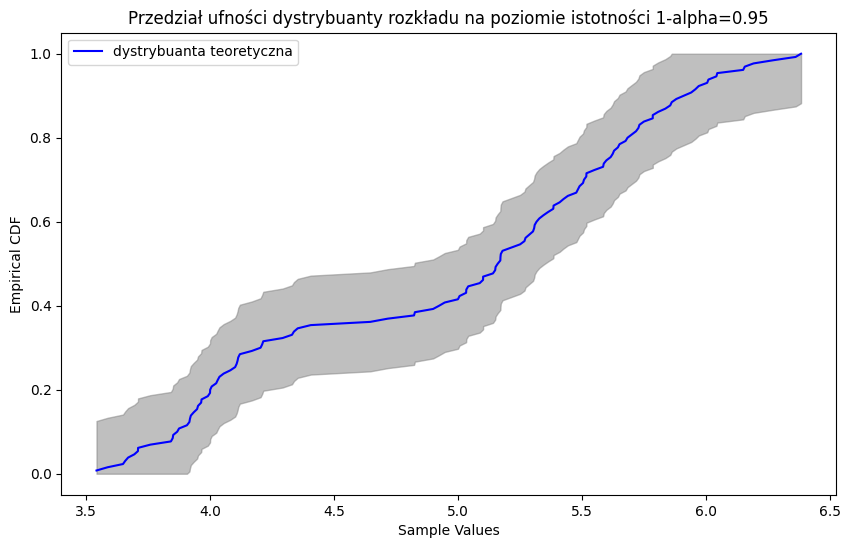

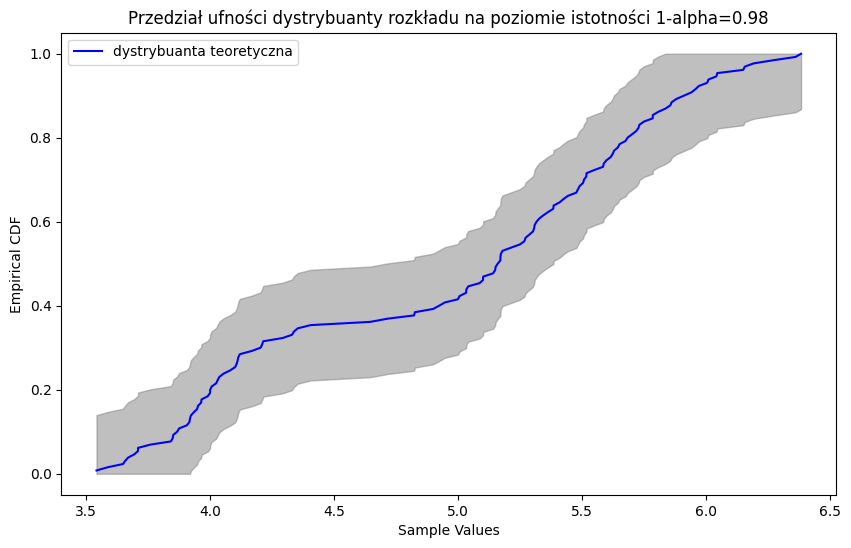

In [10]:
# Komórka testowa
test_results_3 = cdf_estimation(sample, 0.05)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (130, 4)
assert list(test_results_3.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_3.min().values, [3.54233698, 0.00769231, 0., 0.12544548]))
assert np.all(np.isclose(test_results_3.max().values, [6.38176057, 1., 0.88224683, 1.]))
assert np.all(np.isclose(test_results_3.mean().values, [4.9551826 , 0.50384615, 0.3925793 , 0.61420722]))

test_results_4 = cdf_estimation(sample, 0.02)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (130, 4)
assert list(test_results_4.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_4.min().values, [3.54233698, 0.00769231, 0., 0.13935689]))
assert np.all(np.isclose(test_results_4.max().values, [6.38176057, 1., 0.86833542, 1.]))
assert np.all(np.isclose(test_results_4.mean().values, [4.9551826 , 0.50384615, 0.380346, 0.62633351]))